In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Copy from Backup to Main 

In [ ]:
import pandas as pd
import numpy as np
import datetime
import os
import shutil

pd.options.mode.chained_assignment = None  # default='warn'

x = datetime.datetime(2022, 2, 24) #24th Feb 2022
nowx = datetime.datetime(2022,10,31) #31th Oct 2022

src_path = "/content/drive/MyDrive/Research/SentimentAnalysis/LabeledTweets-backup/"
des_path = "/content/drive/MyDrive/Research/SentimentAnalysis/LabeledTweets/"

count = 0


while x != nowx:
    month = x.strftime("%m")
    day = x.strftime("%d")
    filename = 'labeled-tweets-'+day+'-'+month+'-2022.csv'
    isSrcFile = os.path.isfile(src_path+filename)
    isDesFile = os.path.isfile(des_path+filename)
    if isSrcFile:
        if isDesFile:
            print(f"{filename}: File already exist in the destination folder!")
        else:
            shutil.copy(src_path+filename, des_path+filename)
            count = count + 1
    else:
        print(f"{filename}: File not found in the source folder!")

    x=x+datetime.timedelta(days=1)

print(f"{count} files copies from source to the destination!")

249 files copies from source to the destination!


# Marge All Datasets to one Dataset

In [ ]:
import pandas as pd
import datetime
import os
from tqdm import tqdm

df = pd.DataFrame()
x = datetime.datetime(2022, 2, 24) #24th Feb 2022
nowx = datetime.datetime(2022,10,31) #31th Oct 2022

src_path = "/content/drive/MyDrive/Research/SentimentAnalysis/LabeledTweets/"
des_path = "/content/drive/MyDrive/Research/SentimentAnalysis/MargedTweets/"

limit = 249
pbar = tqdm(total=limit, position=0, leave=True)

while x != nowx:
    month = x.strftime("%m")
    day = x.strftime("%d")
    filename = 'labeled-tweets-'+day+'-'+month+'-2022.csv'
    isFile = os.path.isfile(src_path+filename)
    if isFile:
        tmp_df = pd.read_csv(src_path+filename)
        if df.empty:
            df = tmp_df
        else:
            df = df.append(tmp_df, ignore_index=True)
    else:
        print(f"{filename}: File not found!")

    x=x+datetime.timedelta(days=1)

    pbar.update(1)

pbar.close()

df = df[df['rawContent'].notna()]
df = df[df['rawContent'].apply(lambda x: not str(x).isdigit())]
df.info()
df.drop_duplicates(subset='rawContent',inplace=True)
df.info()

marged_filename = "labeled-tweets-all.csv"

df.to_csv(des_path+marged_filename,index=False)

100%|██████████| 249/249 [01:58<00:00,  2.10it/s]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639260 entries, 0 to 1639283
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1633014 non-null  float64
 1   rawContent    1639260 non-null  object 
 2   replyCount    1633014 non-null  float64
 3   retweetCount  1633014 non-null  object 
 4   likeCount     1633014 non-null  object 
 5   quoteCount    1633014 non-null  object 
 6   hashtags      363662 non-null   object 
 7   label         1639260 non-null  object 
dtypes: float64(2), object(6)
memory usage: 112.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611913 entries, 0 to 1639283
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1611901 non-null  float64
 1   rawContent    1611913 non-null  object 
 2   replyCount    1611901 non-null  float64
 3   retweetCount  1611901 non-null  object 
 4

# Creating Balanced Dataset

In [ ]:
import pandas as pd

src_path="/content/drive/MyDrive/Research/SentimentAnalysis/MargedTweets/"
filename = "labeled-tweets-all.csv"

file = pd.DataFrame()
file = pd.read_csv(src_path+filename)

In [ ]:
df = file
df = df.sort_values(['replyCount', 'retweetCount','likeCount','quoteCount'],
              ascending = [False, False, False, False])
display(df)

,id,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,label
1398157,1.576999e+18,@RenataKonkoly Russia is doing partial mobiliz...,52619.0,12186.0,92351.0,4840.0,NaN,negative
154350,1.502354e+18,I want to be clear: We will defend every inch ...,24115.0,23174.0,162622.0,9088.0,NaN,positive
14873,1.497318e+18,To the people of Ukraine: Slava Ukraini. \n\nT...,22483.0,11118.0,56019.0,2311.0,NaN,negative
1301365,1.572247e+18,"Folks, gas prices are now back to levels they ...",18731.0,13564.0,86535.0,2883.0,NaN,negative
44778,1.498399e+18,I spoke today with Allies and partners to disc...,14678.0,8459.0,67817.0,794.0,NaN,negative
...,...,...,...,...,...,...,...,...
554597,NaN,5. #BoJo:,NaN,NaN,NaN,NaN,NaN,neutral
585369,NaN,#Russia continues to send #Mariupol residents ...,NaN,NaN,NaN,NaN,NaN,neutral
608465,NaN,Russia-Ukraine war: China selling imported gas...,NaN,NaN,NaN,NaN,NaN,negative
712484,NaN,@MthuliNcube :It is our sincere hope that the ...,NaN,NaN,NaN,NaN,NaN,positive


In [ ]:
positive_cnt = df['label'].value_counts()['positive']
negative_cnt = df['label'].value_counts()['negative']
neutral_cnt = df['label'].value_counts()['neutral']

print(f"Total Number of Positive Data: {positive_cnt}")
print(f"Total Number of Neutral Data: {neutral_cnt}")
print(f"Total Number of Negative Data: {negative_cnt}")

Total Number of Positive Data: 236621
Total Number of Neutral Data: 270159
Total Number of Negative Data: 1105133


In [ ]:
limit = min(min(positive_cnt,negative_cnt),neutral_cnt)
print(limit)

236621


In [ ]:
df_positive = df.loc[df['label'] == 'positive']
df_negative = df.loc[df['label'] == 'negative']
df_neutral = df.loc[df['label'] == 'neutral']

positive_file = "labeled-positive-tweets-all.csv"
negative_file = "labeled-negative-tweets-all.csv"
neutral_file = "labeled-neutral-tweets-all.csv"

df_positive.to_csv(des_path+positive_file,index=False)
df_negative.to_csv(des_path+negative_file,index=False)
df_neutral.to_csv(des_path+neutral_file,index=False)

df_positive = df_positive.iloc[:limit]
df_negative = df_negative.iloc[:limit]
df_neutral = df_neutral.iloc[:limit]
df_balanced = pd.concat([df_positive, df_negative, df_neutral])

positive_file = "labeled-positive-tweets-balanced.csv"
negative_file = "labeled-negative-tweets-balanced.csv"
neutral_file = "labeled-neutral-tweets-balanced.csv"
balanced_file = "labeled-tweets-balanced.csv"

df_positive.to_csv(des_path+positive_file,index=False)
df_negative.to_csv(des_path+negative_file,index=False)
df_neutral.to_csv(des_path+neutral_file,index=False)
df_balanced.to_csv(des_path+balanced_file,index=False)

# Balanced Tweets Statistics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.mode.chained_assignment = None  # default='warn'

positive_cnt = 0
negative_cnt = 0
neutral_cnt = 0
data_cnt = 0

filename = '/content/drive/MyDrive/Research/SentimentAnalysis/MargedTweets/labeled-tweets-balanced.csv'
isFile = os.path.isfile(filename)
if isFile:
    df = pd.read_csv(filename)
    positive_cnt = positive_cnt+df['label'].value_counts()['positive']
    negative_cnt = negative_cnt+df['label'].value_counts()['negative']
    neutral_cnt = neutral_cnt+df['label'].value_counts()['neutral']
    data_cnt = len(df['label'])
else:
    print("File not found!")

Total Number of Datasets: 709863
Total Number of Positive Data: 236621
Total Number of Neutral Data: 236621
Total Number of Negative Data: 236621


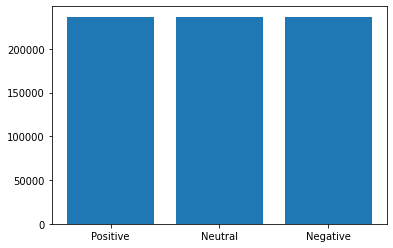

In [ ]:
print(f"Total Number of Datasets: {data_cnt}")
print(f"Total Number of Positive Data: {positive_cnt}")
print(f"Total Number of Neutral Data: {neutral_cnt}")
print(f"Total Number of Negative Data: {negative_cnt}")
plot_labels = ['Positive','Neutral','Negative']
plot_vals = [positive_cnt,neutral_cnt,negative_cnt]
plt.bar(plot_labels, plot_vals)  
plt.show()

In [ ]:
src_path="/content/drive/MyDrive/Research/SentimentAnalysis/MargedTweets/"
posfile = "labeled-positive-tweets-all.csv"
negfile = "labeled-negative-tweets-all.csv"
neufile = "labeled-neutral-tweets-all.csv"
posdf = pd.read_csv(src_path+posfile)
negdf = pd.read_csv(src_path+negfile)
neudf = pd.read_csv(src_path+neufile)

posdf_train=posdf.iloc[:800]
negdf_train=negdf.iloc[:800]
neudf_train=neudf.iloc[:800]
posdf_test=posdf.iloc[800:1000]
negdf_test=negdf.iloc[800:1000]
neudf_test=neudf.iloc[800:1000]
df_train = pd.concat([posdf_train,negdf_train,neudf_train])
df_test = pd.concat([posdf_test,negdf_test,neudf_test])
df_train=df_train.sample(frac=1).reset_index()
df_test=df_test.sample(frac=1).reset_index()
df_train.to_csv(src_path+"labeled-small-train.csv",index=False)
df_test.to_csv(src_path+"labeled-small-test.csv",index=False)
